In [24]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
                                    "exang", "oldpeak", "slope", "ca", "thal", "num")) %>%
        mutate(cp = as.factor(cp), fbs = as.factor(fbs), restecg = as.factor(restecg), exang = as.factor(exang),
               slope = as.factor(slope), thal = as.factor(thal), num = as.factor(num), sex = as.factor(sex))

head(data, 10)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [15]:
data_split <- initial_split(data, prop = 0.75, strata = num)  
data_train <- training(data_split)   
data_test <- testing(data_split)

head(data_train, 5)
head(data_test, 5)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
69,0,1,140,239,0,0,151,0,1.8,1,2.0,3.0,0
43,1,4,120,177,0,2,120,1,2.5,2,0.0,7.0,3


In [11]:
unique(data$thal)

[1] 6.0 3.0 7.0 ?  
Levels: ? 3.0 6.0 7.0

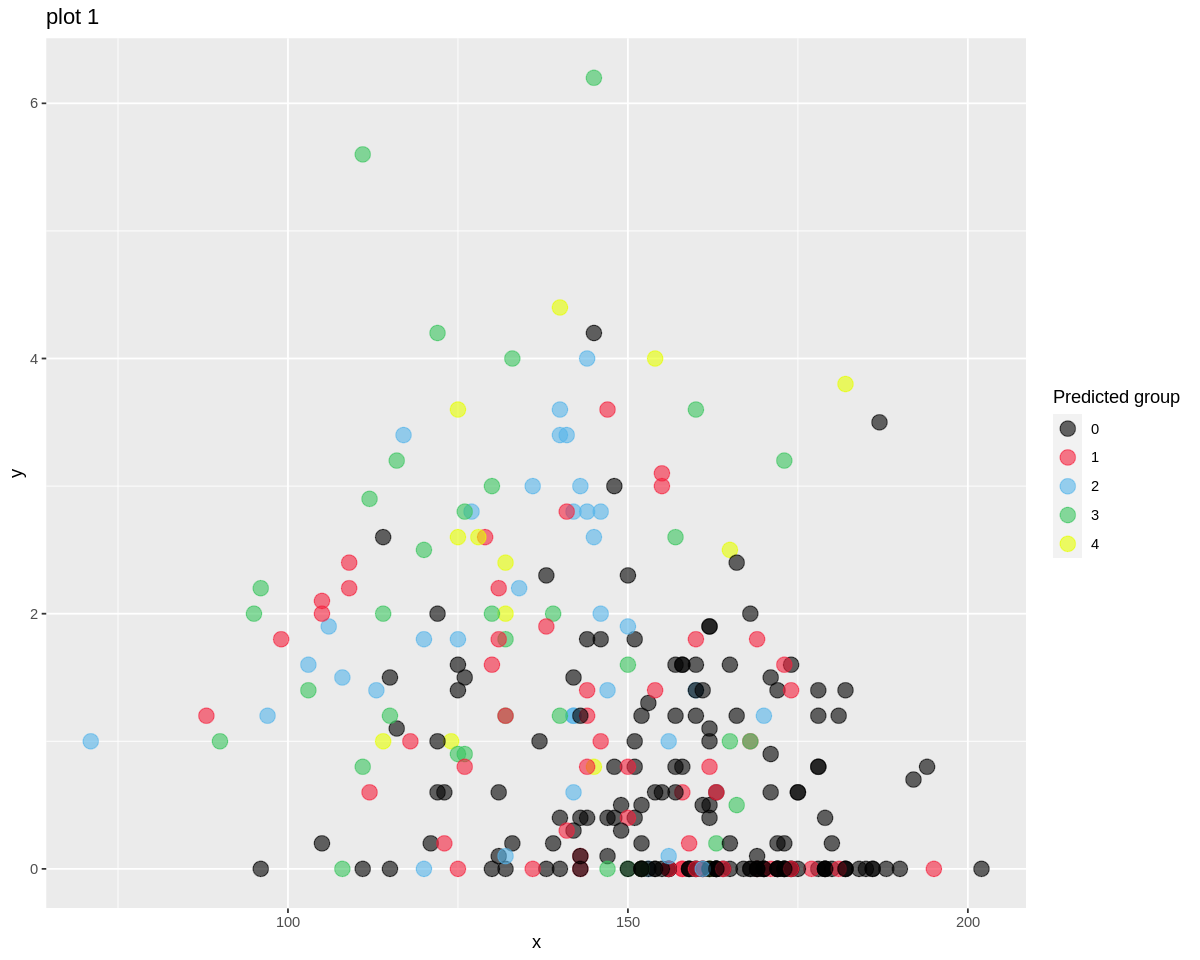

In [46]:
#thalach, age

options(repr.plot.width = 10, repr.plot.height = 8) #Remember to set your plot sizes to an appropiate size

# add the code for your plot here!
smoke_plot <- data %>%
    ggplot(aes(x = thalach, y = oldpeak)) + 
        geom_point(aes(colour=num), alpha = 0.6, size=4) + # Deals with the transparency of the points, set it to an appropiate value
        labs(x= "x", y= "y", colour="Predicted group") + 
        ggtitle("plot 1") +
        scale_color_manual(values=c("#000000", "#F5213D", "#56B4E9", "#39C45E", "#E6FF00"))


smoke_plot

In [49]:
data_num <- data %>%
    select(age, trestbps, chol, thalach, oldpeak)

res <- cor(data_num)
round(res, 2)

,age,trestbps,chol,thalach,oldpeak
age,1.00,0.28,0.21,-0.39,0.20
trestbps,0.28,1.00,0.13,-0.05,0.19
chol,0.21,0.13,1.00,0.00,0.05
thalach,-0.39,-0.05,0.00,1.00,-0.34
oldpeak,0.20,0.19,0.05,-0.34,1.00


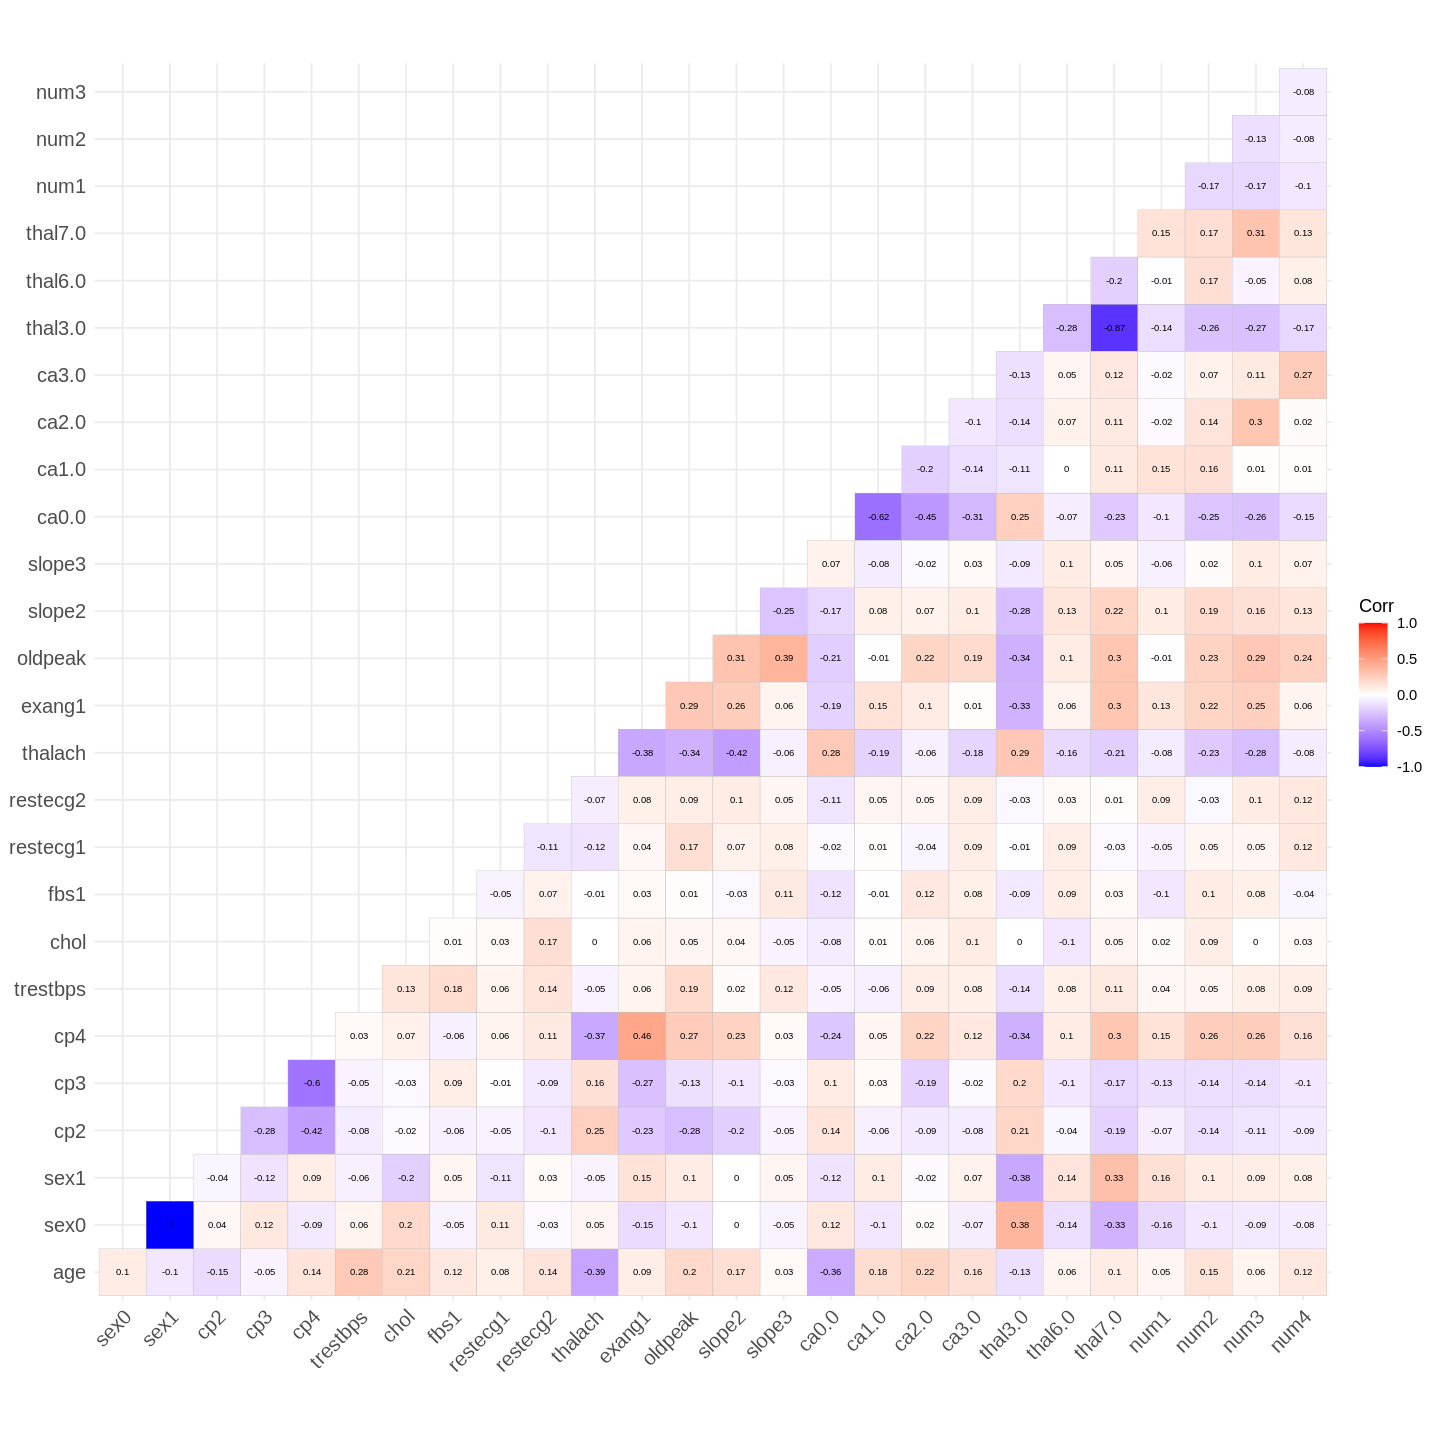

In [56]:
library(ggcorrplot)
options(repr.plot.width = 12, repr.plot.height = 12) #Remember to set your plot sizes to an appropiate size

model.matrix(~0+., data=data) %>% 
  cor(use="pairwise.complete.obs") %>% 
  ggcorrplot(show.diag = F, type="lower", lab=TRUE, lab_size=2)

In [51]:
install.packages("ggcorrplot")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

